In [56]:
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
      dtype=int64))
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(50000, 3072) (50000, 1)
(10000, 3072) (10000, 1)


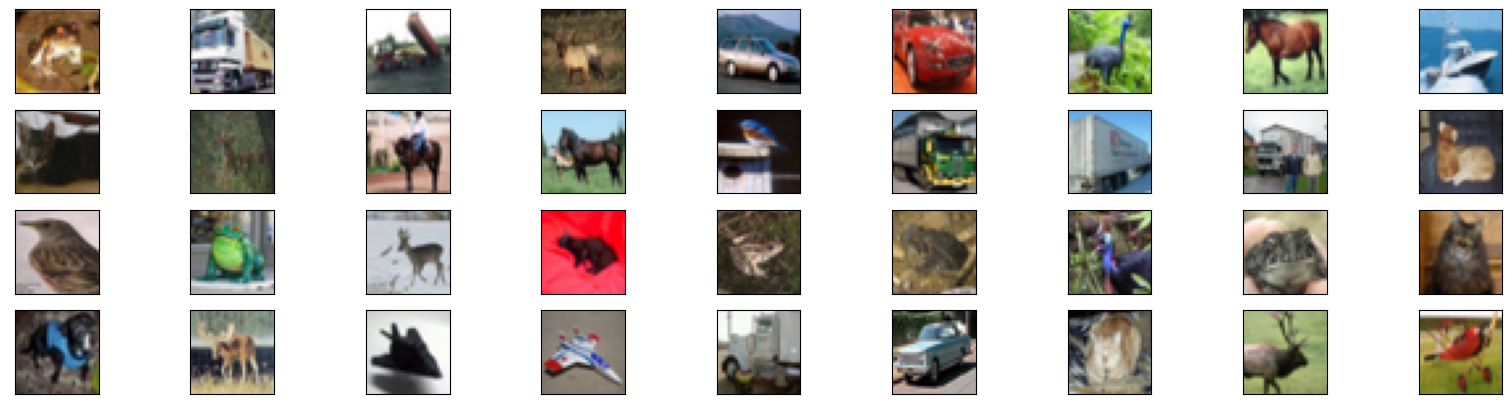

In [57]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(np.unique(y_train, return_counts = True)) 

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)   

figure = plt.figure(figsize=(20,5))
for i in range(36):
    img = figure.add_subplot(4, 9, i+1, xticks=[], yticks=[])
    img.imshow(x_train[i], 'gray')       

# ---------- 전처리 (2차원으로 변환) ---------- #
x_train = x_train.reshape(50000, 32*32*3)
x_test = x_test.reshape(10000, 32*32*3)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)  

x_test = x_test/255.0
x_train = x_train/255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 2. 모델


In [58]:
model = Sequential()
# model.add(Flatten())
model.add(Dense(units=64, input_shape=(32*32*3, ), activation='relu'))
model.add(Dense(units=64, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=32, activation='relu')) 
model.add(Dropout(0.3)) 
model.add(Dense(units=16, activation='relu')) 
model.add(Dense(units=100, activation='softmax')) 
# model.summary()

# 3. 컴파일 및 훈련

In [59]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='acc') # one-hot encoding 하지 않아도 되는 데이터이므로 loss= sparse_categorical_crossentropy

path = 'C:/study/keras/keras_save/MCP/'
MCP = ModelCheckpoint(monitor='acc', mode='auto', save_best_only=True, filepath=path+'keras36_3_cifar10.hdf5') 
ES = EarlyStopping(monitor='acc', mode='auto', patience=4, restore_best_weights=True) 
model.fit(x_train, y_train, epochs=64, batch_size=512, validation_split=0.1, callbacks=[ES, MCP])

Epoch 1/64
88/88 [==============================] - 1s 10ms/step - loss: 2.2140 - acc: 0.1643 - val_loss: 2.0248 - val_acc: 0.2436
Epoch 2/64
88/88 [==============================] - 1s 9ms/step - loss: 2.0035 - acc: 0.2412 - val_loss: 1.9151 - val_acc: 0.2944
Epoch 3/64
88/88 [==============================] - 1s 8ms/step - loss: 1.9428 - acc: 0.2706 - val_loss: 1.8771 - val_acc: 0.3084
Epoch 4/64
88/88 [==============================] - 1s 9ms/step - loss: 1.9010 - acc: 0.2934 - val_loss: 1.8532 - val_acc: 0.3100
Epoch 5/64
88/88 [==============================] - 1s 10ms/step - loss: 1.8733 - acc: 0.3068 - val_loss: 1.8259 - val_acc: 0.3238
Epoch 6/64
88/88 [==============================] - 1s 10ms/step - loss: 1.8501 - acc: 0.3176 - val_loss: 1.7966 - val_acc: 0.3388
Epoch 7/64
88/88 [==============================] - 1s 8ms/step - loss: 1.8300 - acc: 0.3276 - val_loss: 1.7929 - val_acc: 0.3442
Epoch 8/64
88/88 [==============================] - 1s 8ms/step - loss: 1.8121 - acc: 0

# 4. 평가 및 예측

In [ ]:
metric = model.evaluate(x_test, y_test) # compile에서 metrics = acc를 지정했으므로 evaluate는 값을 배열 형태로 2개 반환함
print('loss: ', metric[0], 'acc: ', metric[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.7005 - acc: 0.3910
loss:  1.7005358934402466 acc:  0.39100000262260437
